In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from skimage.feature import hog
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [4]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [5]:
# name = pngs[1][-13:]
# OUT_PATH = '/content/drive/MyDrive/CV_Project/warped/preprocessed/'
# test = OUT_PATH + name
# out = os.path.join(OUT_PATH, name)
# print(type(out))

In [10]:
Train_list = ['F0','F1','F2','F3','F5','F6','F8','F9','F10','F11']
Test_list = ['T1','T2','T3','T4','T5','T6','T7','T8']

PATH = '/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/'

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

for folder in Test_list:

  DirName = os.path.join(PATH, folder)
  files = getListOfFiles(DirName)

  pngs = []
  txts = []
  for file in files:
    if file.endswith('.png'):
      pngs.append(file)
    else:
      txts.append(file)


  for png in pngs:
    print(png)
    im = cv2.imread(png,2)
#     # img = cv2.imread(png)
#     file_name = png[-13:]

#     ### preprocessing

#     # dst = cv2.fastNlMeansDenoisingColored(img,None,3,3,7,21)
#     # dst2 = gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

#     bilateral=cv2.bilateralFilter(im,9,75,75)
#     # sharpenKernel = np.array(([[0, -1, 0], [-1, 9, -1], [0, -1, 0]]), np.float32)/9
#     # sharpen= cv2.filter2D(dst, -1, sharpenKernel)
#     # ret,thresh4 = cv2.threshold(bilateral,120,255,cv2.THRESH_TOZERO)
#     cl1 = clahe.apply(bilateral)
#     final = cl1

#     #HOG
#     # gx = cv2.Sobel(cl1, cv2.CV_32F, 1, 0, ksize=1)
#     # gy = cv2.Sobel(cl2, cv2.CV_32F, 0, 1, ksize=1)

#     # ret,thresh = cv2.threshold(gx,1,255,cv2.THRESH_TOZERO_INV)
#     # final = thresh4-thresh*2

#     ### store the data
# # ;

/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T1/T1_line3.png
/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T1/T1_line4.png
/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T1/T1_line5.png
/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T1/T1_line6.png
/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T1/T1_line7.png
/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T1/T1_line8.png
/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T2/T2_line3.png
/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T2/T2_line4.png
/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T2/T2_line5.png
/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T2/T2_line6.png
/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T3/T3_line6.png
/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T3/T3_line7.png
/con

In [9]:
pngs

['/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T8/T8_line3.png',
 '/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T8/T8_line4.png',
 '/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T8/T8_line5.png',
 '/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T8/T8_line6.png',
 '/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T8/T8_line7.png',
 '/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T8/T8_line8.png',
 '/content/drive/MyDrive/CV_Project/integrals for preprocessing/test/T8/T8_line9.png']

In [ ]:
im = cv2.imread(pngs[2],2)
img = cv2.imread(pngs[2])
dst = cv2.fastNlMeansDenoisingColored(img,None,3,3,7,21)
dst2 = gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
# sharpenKernel = np.array(([[0, -1, 0], [-1, 9, -1], [0, -1, 0]]), np.float32)/9
# sharpen= cv2.filter2D(dst2, -1, sharpenKernel)
# eqhist=cv2.equalizeHist(im)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(im)

# plt.figure(figsize=(25,8))
# plt.subplot(131),plt.hist(im)
# plt.subplot(132),plt.hist(dst2)
# # plt.subplot(143),plt.hist(sharpen)
# plt.subplot(133),plt.hist(cl1)
# plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4d23217550>,
 <matplotlib.image.AxesImage at 0x7f4d29c4d390>)

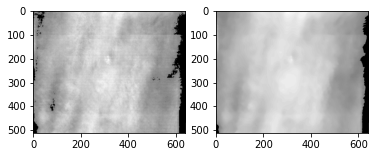

In [ ]:
cl2 = clahe.apply(dst2)
ret,thresh4 = cv2.threshold(cl2,127,255,cv2.THRESH_TOZERO)
ret,thresh3 = cv2.threshold(cl1,127,255,cv2.THRESH_TOZERO)

plt.figure(figsize=(15,8))
plt.subplot(121),plt.imshow(thresh3,cmap='gray')
plt.subplot(122),plt.imshow(thresh4,cmap='gray')

In [ ]:
# contours,hierarchy = cv2.findContours(gx, 1, 2)
# edge = cv2.Canny(thresh, 60, 180)
# plt.imshow(edge)

In [ ]:
gx = cv2.Sobel(cl1, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(cl2, cv2.CV_32F, 0, 1, ksize=1)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4d15244400>,
 <matplotlib.image.AxesImage at 0x7f4d187fdc18>)

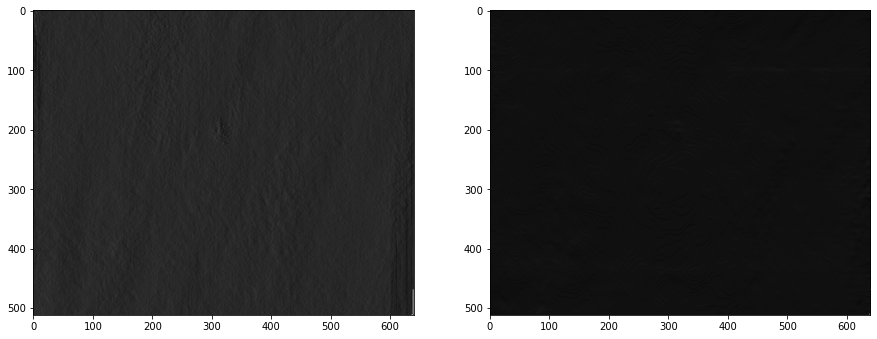

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(121),plt.imshow(gx,cmap='gray')
plt.subplot(122),plt.imshow(gy,cmap='gray')

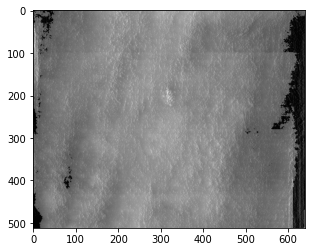

In [ ]:
# e_g=cv2.equalizeHist(gx)
# plt.hist(gx)
plt.show()
ret,thresh = cv2.threshold(gx,1,255,cv2.THRESH_TOZERO_INV)
plt.imshow(thresh3-thresh*5, cmap='gray')

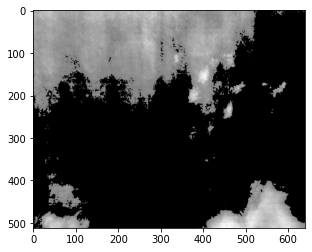

In [ ]:
plt.imshow(thresh4, cmap='gray')
plt.show()

In [ ]:
Train_list = ['T1']
# Test_list = ['T1','T2','T3','T4','T5','T6','T7','T8']

PATH = '/content/drive/MyDrive/CV_Project/integrals/test/'

for folder in Train_list:

  DirName = os.path.join(PATH, folder)
  files = getListOfFiles(DirName)

  pngs = []
  txts = []
  for file in files:
    if file.endswith('.png'):
      pngs.append(file)
    else:
      txts.append(file)